In [27]:
!git clone https://github.com/MinkyuRamen/hackaton_1128.git

fatal: destination path 'hackaton_1128' already exists and is not an empty directory.


In [28]:
import pickle
with open('/content/hackaton_1128/preprocess_data/pickle_preprocess.pkl', 'rb') as f:
    data = pickle.load(f)

In [29]:
data.columns.__len__()

9

In [30]:
# load columns dynamically
for i in range(len(data.columns)):
  globals()[f'col{i}'] = data.iloc[:,i].dropna()

In [31]:
data.columns

Index(['조이혼율', 'GNI 증감률', '총지수_증감률', '조혼인율', '여성초혼 연령', '여성경제 활동참가율',
       '알코올 질환 인구 10만 명당 여성 사망률', '주택가격지수_전국', 'GDP디플레이터_증감률'],
      dtype='object')

In [32]:
type(col0)

pandas.core.series.Series

In [104]:
import numpy as np
import matplotlib.pyplot as plt

def euler_maruyama(data, mu, sigma, num_simulations, initial_population):
    """
    Euler-Maruyama 메서드를 사용하여 SDE를 풀이하는 함수

    Parameters:
    - mu: drift term
    - sigma: diffusion term
    - X0: 초기값
    - T: 전체 시간
    - dt: 각 time step의 크기

    Returns:
    - t_values: 시간 배열
    - population: 해당 시간에서의 값 배열
    """
    dt = 1/365
    T = len(data) # data input exists as Series
    num_steps = int(T / dt)
    t_values = np.linspace(0, T, num_steps + 1)
    T_values = np.linspace(T+1, num_steps, T).astype(int) # daily cumulative 중 yearly integer

    # 각 시뮬레이션에서의 결과를 저장할 배열
    population_all = np.zeros((num_simulations, num_steps + 1))

    for j in range(num_simulations):
      population = np.zeros(num_steps + 1)
      population[0] = initial_population


      for i in range(num_steps):
          dW = np.random.normal(0, np.sqrt(dt))
          population[i + 1] = population[i] + mu * population[i] * dt + sigma * population[i] * dW

          population_all[j, :] = population

    return t_values, T_values, population_all

# 초기값 및 하이퍼파라미터 설정
mu0 = 0.01
sigma0 = 0.10


# SDE
for i in range(len(data.columns)):
  globals()[f"t_values{i}"], globals()[f"T_values{i}"], globals()[f"population{i}"] = euler_maruyama(
      data = globals()[f"col{i}"], mu = mu0, sigma = sigma0,
      num_simulations = 100, initial_population = globals()[f"col{i}"][0])

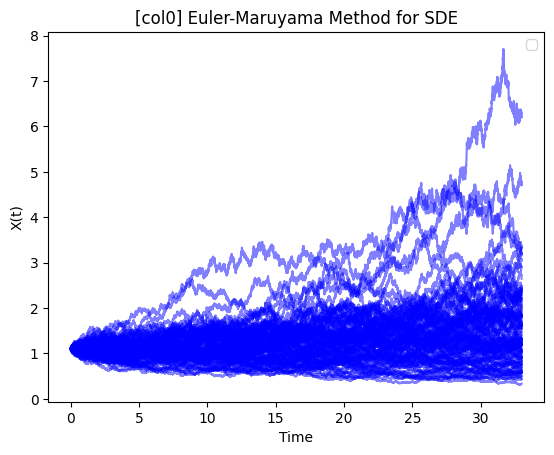

In [105]:
# 결과 시각화
for j in range(100):
  plt.plot(t_values0, population0[j, :], color = "blue", alpha = 0.5)
plt.title("[col0] Euler-Maruyama Method for SDE")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.legend()
plt.show()

<Axes: >

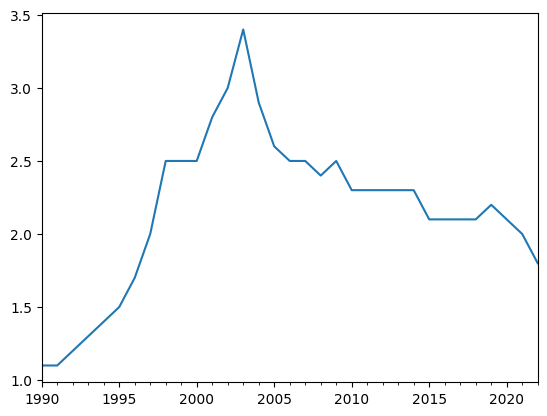

In [106]:
col0.plot()

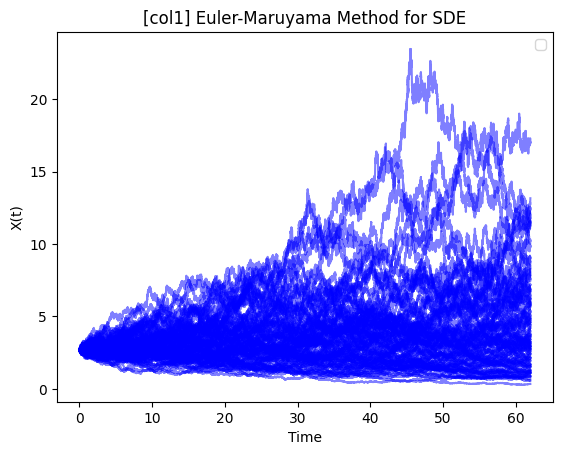

In [107]:
for j in range(100):
  plt.plot(t_values1, population1[j, :], color = "blue", alpha = 0.5)
plt.title("[col1] Euler-Maruyama Method for SDE")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.legend()
plt.show()

<Axes: >

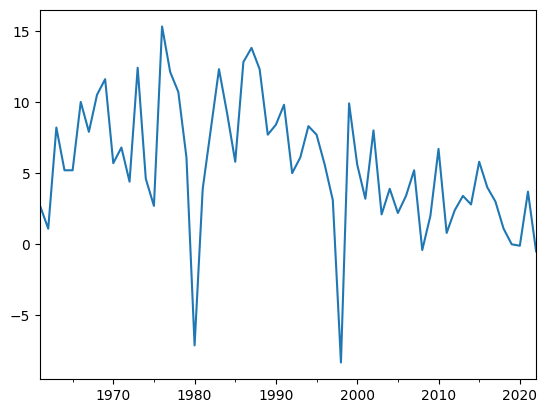

In [102]:
col1.plot()

In [68]:
t_values0.shape

(12046,)

In [69]:
T_values0.shape

(33,)

In [70]:
population0.shape

(100, 12046)

In [71]:
# code for prediction
population0[:,T_values0].shape

(100, 33)

In [72]:
T_values0

array([   34,   409,   784,  1160,  1535,  1910,  2286,  2661,  3036,
        3412,  3787,  4162,  4538,  4913,  5288,  5664,  6039,  6414,
        6790,  7165,  7540,  7916,  8291,  8666,  9042,  9417,  9792,
       10168, 10543, 10918, 11294, 11669, 12045])

# ⛄Optimization 해야하는데, 일단 건너뛰고 prediction부터 함

In [109]:
def euler_maruyama_(T, mu, sigma, num_simulations, initial_population):
    """
    Euler-Maruyama 메서드를 사용하여 SDE를 풀이하는 함수

    Parameters:
    - mu: drift term
    - sigma: diffusion term
    - X0: 초기값
    - T: 전체 시간
    - dt: 각 time step의 크기

    Returns:
    - t_values: 시간 배열
    - population: 해당 시간에서의 값 배열
    """
    dt = 1/365
    num_steps = int(T / dt)
    t_values = np.linspace(0, T, num_steps + 1)
    T_values = np.linspace(T+1, num_steps, T).astype(int) # daily cumulative 중 yearly integer

    # 각 시뮬레이션에서의 결과를 저장할 배열
    population_all = np.zeros((num_simulations, num_steps + 1))

    for j in range(num_simulations):
      population = np.zeros(num_steps + 1)
      population[0] = initial_population


      for i in range(num_steps):
          dW = np.random.normal(0, np.sqrt(dt))
          population[i + 1] = population[i] + mu * population[i] * dt + sigma * population[i] * dW

          population_all[j, :] = population

    return t_values, T_values, population_all


In [110]:
future_steps = 50
for i in range(len(data.columns)):
  _, _, globals()[f"predicted_population{i}"] = euler_maruyama_(future_steps,
                                                     mu = mu0, sigma = sigma0,
                                                     num_simulations = 1000,
                                                     initial_population = globals()[f"col{i}"][-1])

In [111]:
t_values_pred = np.linspace(1, future_steps, future_steps*365+1)
T_values_pred = np.linspace(future_steps+1, future_steps*365, future_steps*365).astype(int)

Text(0.5, 1.0, 'Stochastic Process of DIVORCE RATE 50 years with daily update (mean)')

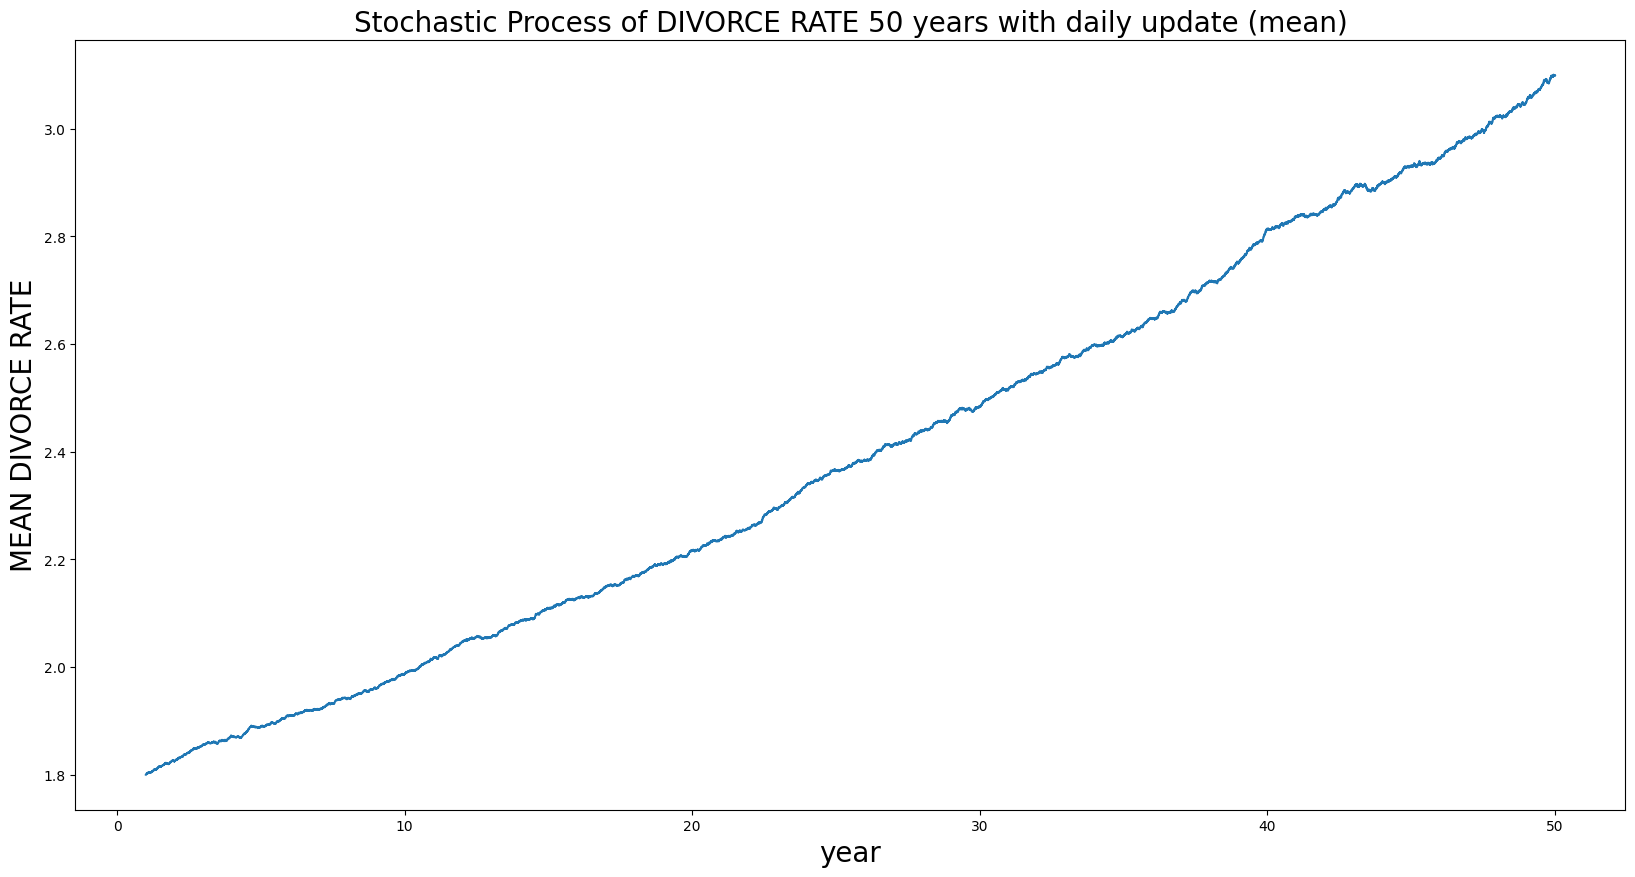

In [112]:
plt.figure(figsize = (20,10))
plt.plot(t_values_pred, np.mean(predicted_population0, axis = 0))
plt.xlabel("year", fontsize = 20)
plt.ylabel("MEAN DIVORCE RATE", fontsize = 20)
plt.title("Stochastic Process of DIVORCE RATE 50 years with daily update (mean)", fontsize = 20)

Text(0.5, 1.0, 'Stochastic Process of DIVORCE RATE 50 years with daily update (mean)')

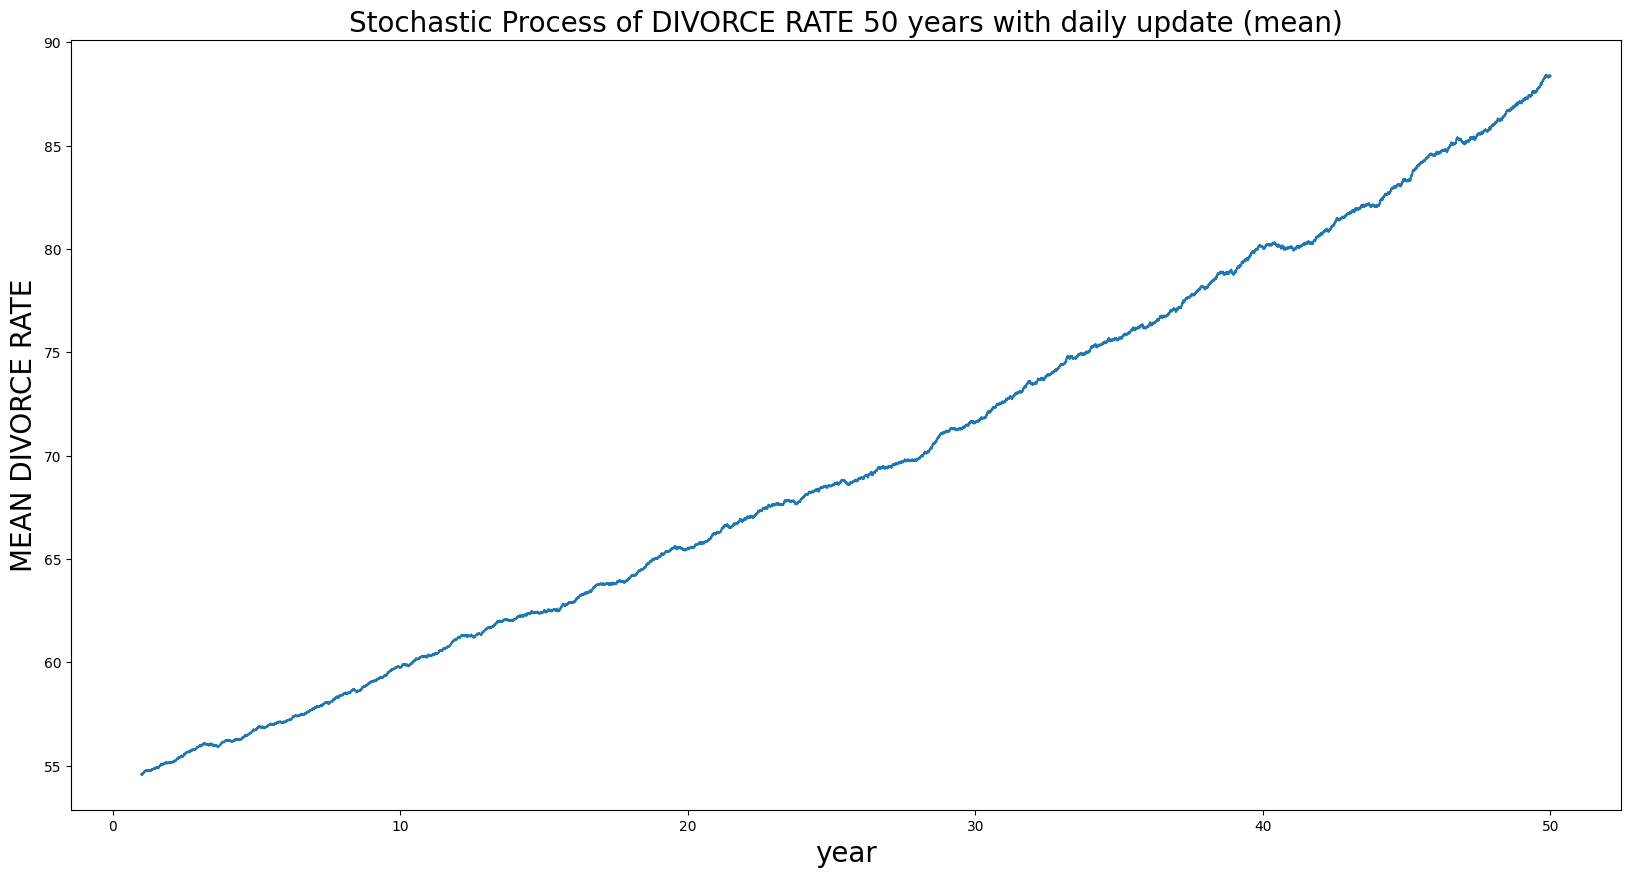

In [121]:
plt.figure(figsize = (20,10))
plt.plot(t_values_pred, np.mean(predicted_population5, axis = 0))
plt.xlabel("year", fontsize = 20)
plt.ylabel("MEAN DIVORCE RATE", fontsize = 20)
plt.title("Stochastic Process of DIVORCE RATE 50 years with daily update (mean)", fontsize = 20)

Text(0.5, 1.0, 'Stochastic Process of DIVORCE RATE 50 years with daily update (median)')

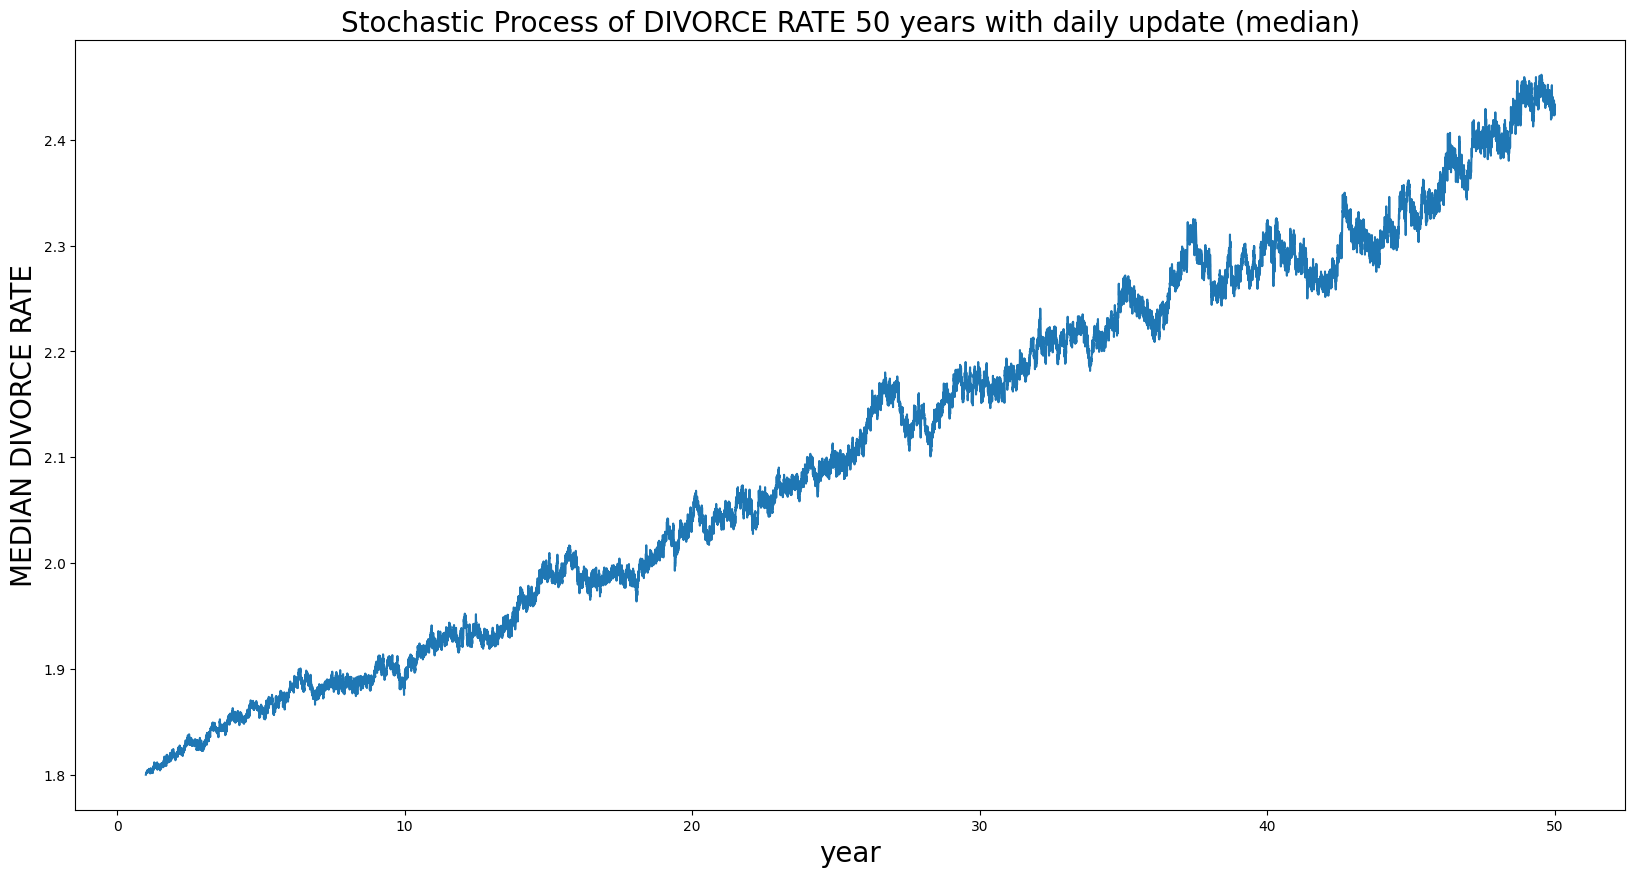

In [113]:
plt.figure(figsize = (20,10))
plt.plot(t_values_pred, np.median(predicted_population0, axis = 0))
plt.xlabel("year", fontsize = 20)
plt.ylabel("MEDIAN DIVORCE RATE", fontsize = 20)
plt.title("Stochastic Process of DIVORCE RATE 50 years with daily update (median)", fontsize = 20)

<ipython-input-114-5c68e519c553>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(year10pred_col0)


<Axes: ylabel='Density'>

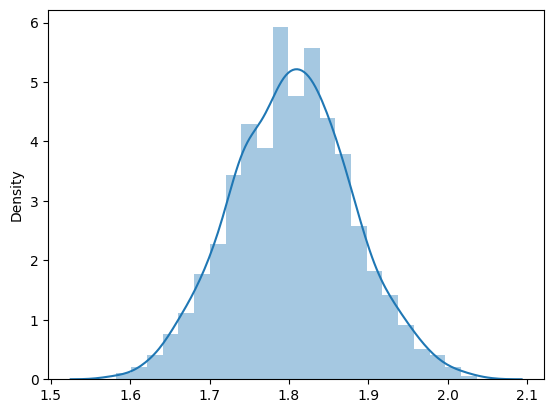

In [114]:
# 10 year future distribution for next day
year10pred_col0 = predicted_population0[:, T_values_pred[9]]
import seaborn as sns
sns.distplot(year10pred_col0)

In [116]:
# assign mean function as data.frame(csv)
import pandas as pd
for i in range(len(data.columns)):
  globals()[f"x_col{i}"] = np.mean(globals()[f"predicted_population{i}"], axis = 0)
  globals()[f"x_col{i}"] = globals()[f"x_col{i}"][T_values_pred]
  globals()[f"x_col{i}"] = pd.DataFrame(globals()[f"x_col{i}"])
  globals()[f"x_col{i}"].to_csv(f"x_col{i}.csv")